training time = 5.0 sec
Matrix is correct! Error= 2.882981064072385e-08
Variance is correct! Error= 0.0004142502068092587

 Eigenvalues corresponding to the first 10 principal components are:
[2718207.40988722 2610783.99363041  365363.88318788  211062.3677067
  110557.40979615  104672.41713697   78480.41139035   67004.29456699
   52571.01809635   49176.70124035]


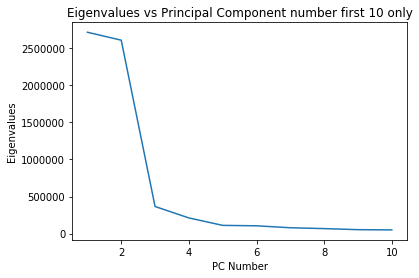

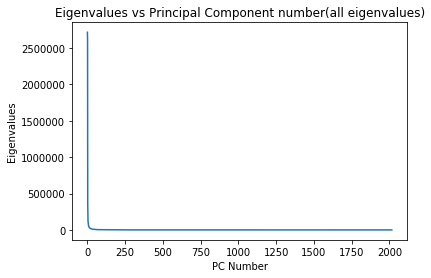

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

def validate_PCA(states, train_data):
  from sklearn.decomposition import PCA
  pca = PCA()
  pca.fit(train_data)
  true_matrix = pca.components_.T
  true_ev = pca.explained_variance_
  
  output_matrix = states['transform_matrix']
  error = np.mean(np.abs(np.abs(true_matrix) - np.abs(output_matrix)) / np.abs(true_matrix))
  if error > 0.01:
    print('Matrix is wrong! Error=',error)
  else:
    print('Matrix is correct! Error=', error)

  output_ev = states['eigen_vals']
  error = np.mean(np.abs(true_ev - output_ev) / true_ev)
  if error > 0.01:
    print('Variance is wrong! Error=', error)
  else:
    print('Variance is correct! Error=', error)

def train_PCA(train_data):
  ##### TODO: Implement here!! #####
  # Note: do NOT use sklearn here!
  # Hint: np.linalg.eig() might be useful
  states = {
      'transform_matrix': np.identity(train_data.shape[-1]),
      'eigen_vals': np.ones(train_data.shape[-1])
  }
 
  ##### TODO: Implement here!! #####
  N=train_data.shape[0]     # train_data (N,w*h)  
  xmean=np.average(train_data,axis=0)  #xmean (2016,)
  diff=train_data-xmean  #(2414, 2016)
  #S=np.cov(train_data)
  S=(1/N)*np.dot(diff.T,diff)  #cov matrix
  values,vectors=np.linalg.eig(S)
  indices=(-values).argsort()
  states['eigen_vals']=values[indices]
  states['transform_matrix']=vectors[:,indices]
    
  
  
  return states

# Load data
start = time.time()
images = np.load('q2data/q2.npy')
num_data = images.shape[0]

train_data = images.reshape(num_data, -1)

states = train_PCA(train_data)
print('training time = %.1f sec'%(time.time() - start))

validate_PCA(states, train_data)


#Question 2(b)
#Report the eigenvalues corresponding to the ﬁrst 10 principal components, 
#and plot all the eigenvalues where x-axis is the index of corresponding principal components
#and y-axis is the eigenvalue.


print("\n Eigenvalues corresponding to the first 10 principal components are:")
print(states['eigen_vals'][:10])
plt.title('Eigenvalues vs Principal Component number first 10 only')
plt.xlabel('PC Number')
plt.ylabel('Eigenvalues')


plt.plot(range(1,11),states['eigen_vals'][:10])
plt.figure()


plt.title('Eigenvalues vs Principal Component number(all eigenvalues)')
plt.xlabel('PC Number')
plt.ylabel('Eigenvalues')


plt.plot(np.arange(1,states['eigen_vals'].shape[0]+1),states['eigen_vals'])



(1, 48, 42)


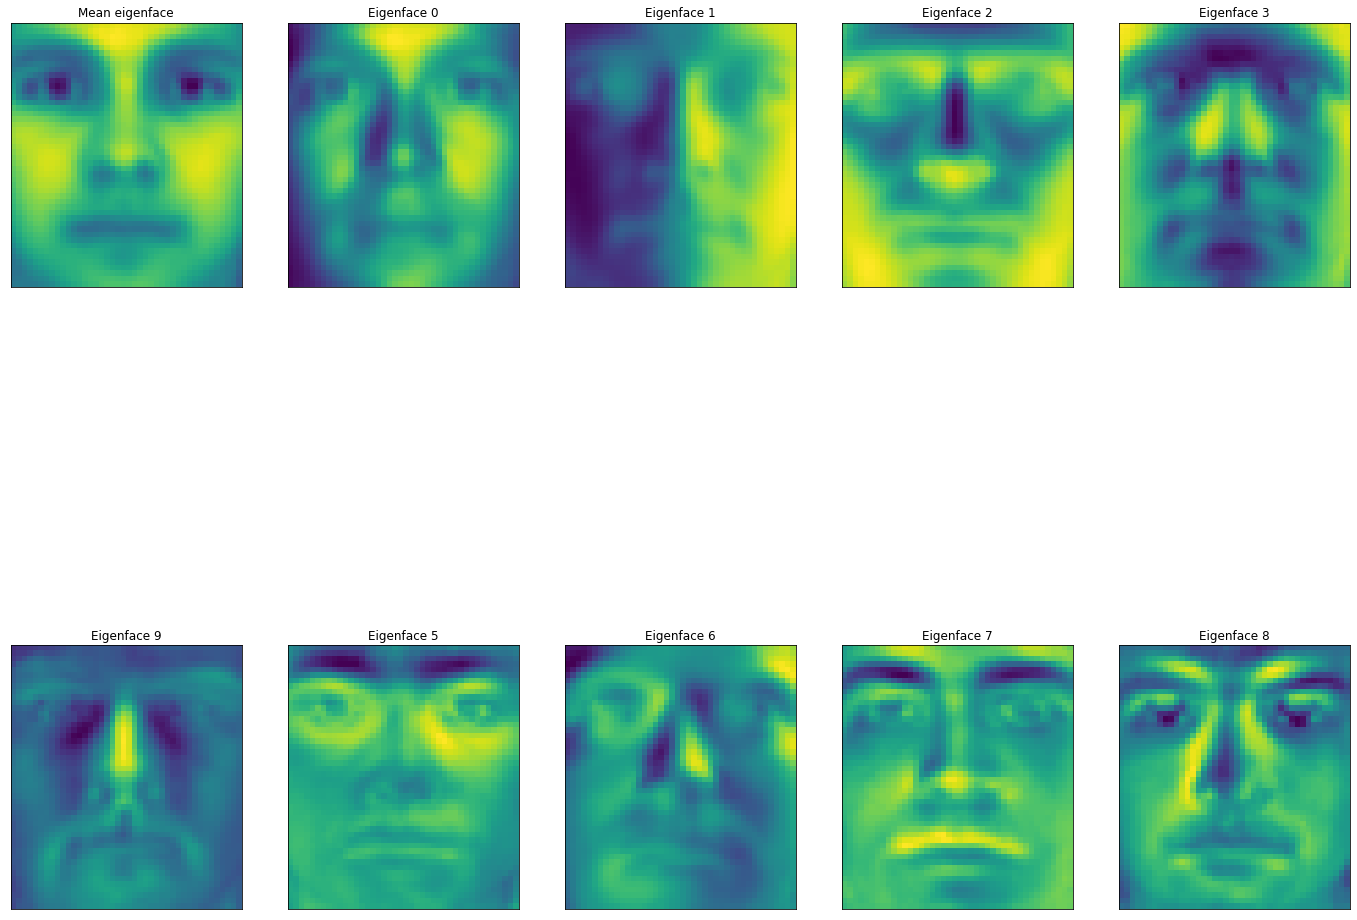

In [102]:
#Question 2 (c)

#(c) (4 pts) Hand in a 2×5 array of subplots showing the ﬁrst 10 principal components/eigenvectors (”eigenfaces”)
#(sorted according to the descending eigenvalues) as images, 
#treating the mean of images as the ﬁrst principal component. 
#Comment on what facial or lighting variations some of the diﬀerent principal components 
#are capturing (Note: you don’t need to comment for all the images.
#Just pick a few that capture some salient aspects of image).


xmean=np.average(train_data,axis=0).reshape(1,images.shape[1],images.shape[2])
print(xmean.shape)
fix,ax=plt.subplots(2,5,figsize=(24,21))
ax[0,0].imshow(xmean[0])
ax[0,0].title.set_text("Mean eigenface")
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

j=0
k=1
for i in range(10):
    if k%5==0:
        j=1
        k=0
    img=(states['eigen_vals'][i]*states['transform_matrix'][:,i]).reshape(1,images.shape[1],images.shape[2])
    ax[j,k].imshow(img[0])
    ax[j,k].title.set_text("Eigenface "+str(i))
    ax[j,k].set_xticks([])
    ax[j,k].set_yticks([])
    k=k+1

    
# Comment on what facial or lighting variations some of the diﬀerent principal components are 
#capturing (Note: you don’t need to comment for all the images. 
#Just pick a few that capture some salient aspects of image).




In [117]:
#Part (d)

#For 95%

total_eig_vals=states['eigen_vals'].shape[0]  #(2016,)
v_L=np.sum(states['eigen_vals'],axis=0)   #7309038.532451195*.95=6943586.606
for k in range(1,total_eig_vals):
    v_k=np.sum(states['eigen_vals'][:k],axis=0)
    if (v_k/v_L>=.95):
        break
        
        
print("For 95%:")
print("K=",k)
print("v(K)=",v_k)
print("v(K)/v(L)=",v_k/v_L)
print("Percentage of reduction in dimension=",((total_eig_vals-k)*100)/total_eig_vals)

print("\n For 99%:")
for k in range(43,total_eig_vals):
    v_k=np.sum(states['eigen_vals'][:k],axis=0)
    if (v_k/v_L>=.99):
        break

print("K=",k)
print("v(K)=",v_k)
print("v(K)/v(L)=",v_k/v_L)
print("Percentage of reduction in dimension=",((total_eig_vals-k)*100)/total_eig_vals)
        
#What is the percentage of reduction in dimension in each case?!!!



For 95%:
K= 43
v(K)= 6945942.783331761
v(K)/v(L)= 0.9503223649037648
Percentage of reduction in dimension= 97.8670634920635

 For 99%:
K= 167
v(K)= 7236289.066843625
v(K)/v(L)= 0.9900466435791012
Percentage of reduction in dimension= 91.71626984126983
